In [0]:
from google.colab import drive
drive.mount('/content/drive')

### Time series data Forecasting techniques

#### The Naive Approach

![alt text](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/02/naive_new-768x495.png)

- If we want to forecast the price for the next day, we can simply take the last day value and estimate the same value for the next day.

![alt text](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/01/Screen-Shot-2018-01-25-at-7.45.20-PM.png)

![alt text](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/02/naive-768x519.png
)

#### The Simple average

![alt text](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/02/avg_orig_new1-768x510.png)

- Lots of times we are provided with a dataset, which varies by a small margin throughout it’s time period, but the average at each time period remains constant. 
- In such a case we can forecast the price of the next day somewhere similar to the average of all the past days.

![alt text](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/01/Screen-Shot-2018-01-25-at-7.45.10-PM-300x82.png)

![alt text](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/02/avg-768x511.png)


#### The Moving average

![alt text](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/02/mov_avg_new-768x531.png)

- Using the prices of the initial period would highly affect the forecast for the next period. 
- Therefore as an improvement over simple average, we will take the average of the prices for last few time periods only. 

![alt text](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/01/Screen-Shot-2018-01-25-at-7.47.33-PM.png)

![alt text](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/02/moving_avg-850x428.png)


#### Single Exponential smoothing 

![alt text](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/01/Screen-Shot-2018-01-25-at-7.59.27-PM-768x90.png
)

-It may be sensible to attach larger weights to more recent observations than to observations from the distant past. 
- The technique which works on this principle is called Simple exponential smoothing.
- Forecasts are calculated using weighted averages where the weights decrease exponentially as observations come from further in the past, the smallest weights are associated with the oldest observations:

![alt text](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/02/SES-768x392.png)

Doesn't this look similar to the discounted return concept from reinforcement learning? 

![alt text](https://image.slidesharecdn.com/reinforcementlearning-170329091514/95/reinforcement-learning-17-638.jpg?cb=1490778934
)

#### Holt’s linear trend method

![alt text](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/02/hl_new-768x408.png)

- Holt extended simple exponential smoothing to allow forecasting of data with a trend.
- It is nothing more than exponential smoothing applied to both level(the average value in the series) and trend.

![alt text](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/02/eq-768x317.png)

![alt text](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/02/HL-768x390.png)


#### Holt’s Winter seasonal method

![alt text](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/01/Picture1.jpg)

- The level equation shows a weighted average between the seasonally adjusted observation and the non-seasonal forecast for time t. 
- The trend equation is identical to Holt’s linear method. 
- The seasonal equation shows a weighted average between the current seasonal index, and the seasonal index of the same season last year (i.e., s time periods ago).

![alt text](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/01/eq.png)

![alt text](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/02/HW.png)



#### Multivariate Time Series

- Similar, but finds linear interdependencies between multiple variables. 
- Each variable has a regression like equation, where it is regressed against its own lagged values and the lagged values of other variables
- Examples includes ARIMA, ARIMAX, etc.
- Or treat it like a supervised problem and use the sequential power of LSTM networks. 

#### Reinforcement Learning for time series data?

- In reinforcement learning, there is an agent acting on the outside world, observing effects and learning to improve its behaviour. 
- In contrast, a time series forecast setting has a passive observer which do not interact with the environment. 
- Ideally, the environment 'reacts' to actions that an 'agent' takes. 

### Examples
- Game world example is 'cartpole', if the pole moves in one direction, the balance its on moves as well.
- Real world examples include any system that adapts to changes made by an agent
- In the stock market, where buy and sell actions effect the price
- In an electricity grid, where optimizing energy output effects interdependent variables like the cooling demand
- Sensor networks, public works, all sorts of routing strategies inside of an interconnected system

![alt text](http://www.turingfinance.com/wp-content/uploads/2014/04/Reinforcement-Learning.png)

### We need more simulated environments! Create simulated environments for businesses, great startup idea


In [2]:
#1 - List the dataset
!ls "/content/drive/My Drive/train.h5"

'/content/drive/My Drive/train.h5'


In [3]:
#2 - Convert data to pandas dataframe
!pip install --upgrade tables

import pandas as pd

with pd.HDFStore('/content/drive/My Drive/train.h5', "r") as train:
  df = train.get("train")
  

    100% |████████████████████████████████| 3.8MB 10.7MB/s 
    100% |████████████████████████████████| 163kB 31.0MB/s 


In [4]:
#3 - how big is our dataset?
len(df)

1710756

In [5]:
#4 - Examine the dataset
df.head()

id  timestamp  derived_0  derived_1  derived_2  derived_3  derived_4  \
0  10          0   0.370326  -0.006316   0.222831  -0.213030   0.729277   
1  11          0   0.014765  -0.038064  -0.017425   0.320652  -0.034134   
2  12          0  -0.010622  -0.050577   3.379575  -0.157525  -0.068550   
3  25          0        NaN        NaN        NaN        NaN        NaN   
4  26          0   0.176693  -0.025284  -0.057680   0.015100   0.180894   

   fundamental_0  fundamental_1  fundamental_2    ...     technical_36  \
0      -0.335633       0.113292       1.621238    ...         0.775208   
1       0.004413       0.114285      -0.210185    ...         0.025590   
2      -0.155937       1.219439      -0.764516    ...         0.151881   
3       0.178495            NaN      -0.007262    ...         1.035936   
4       0.139445      -0.125687      -0.018707    ...         0.630232   

   technical_37  technical_38  technical_39  technical_40  technical_41  \
0           NaN           NaN           NaN     -0.414776           NaN   
1           NaN           NaN           NaN     -0.273607           NaN   
2           NaN           NaN           NaN     -0.175710           NaN   
3           NaN           NaN           NaN     -0.211506           NaN   
4           NaN           NaN           NaN     -0.001957           NaN   

   technical_42  technical_43  technical_44         y  
0           NaN          -2.0           NaN -0.011753  
1           NaN          -2.0           NaN -0.001240  
2           NaN          -2.0           NaN -0.020940  
3           NaN          -2.0           NaN -0.015959  
4           NaN           0.0           NaN -0.007338  

[5 rows x 111 columns]

In [6]:
#5 - how many labels and values do we have? 

labels = []
values = []

for col in df.columns:
  labels.append(col)
  values.append(df[col].isnull().sum())
  print(col, values[-1])
  

id 0
timestamp 0
derived_0 72959
derived_1 81029
derived_2 398651
derived_3 149471
derived_4 406458
fundamental_0 23947
fundamental_1 679070
fundamental_2 368840
fundamental_3 454380
fundamental_5 962020
fundamental_6 701625
fundamental_7 26340
fundamental_8 373166
fundamental_9 565567
fundamental_10 112977
fundamental_11 368840
fundamental_12 110871
fundamental_13 355138
fundamental_14 356084
fundamental_15 354897
fundamental_16 355138
fundamental_17 97222
fundamental_18 15833
fundamental_19 54588
fundamental_20 110871
fundamental_21 54333
fundamental_22 558488
fundamental_23 356723
fundamental_24 576655
fundamental_25 121894
fundamental_26 657184
fundamental_27 281298
fundamental_28 667331
fundamental_29 354106
fundamental_30 354907
fundamental_31 454380
fundamental_32 111672
fundamental_33 13835
fundamental_34 434862
fundamental_35 424476
fundamental_36 15843
fundamental_37 355843
fundamental_38 803489
fundamental_39 377574
fundamental_40 279702
fundamental_41 30115
fundamental_42 2

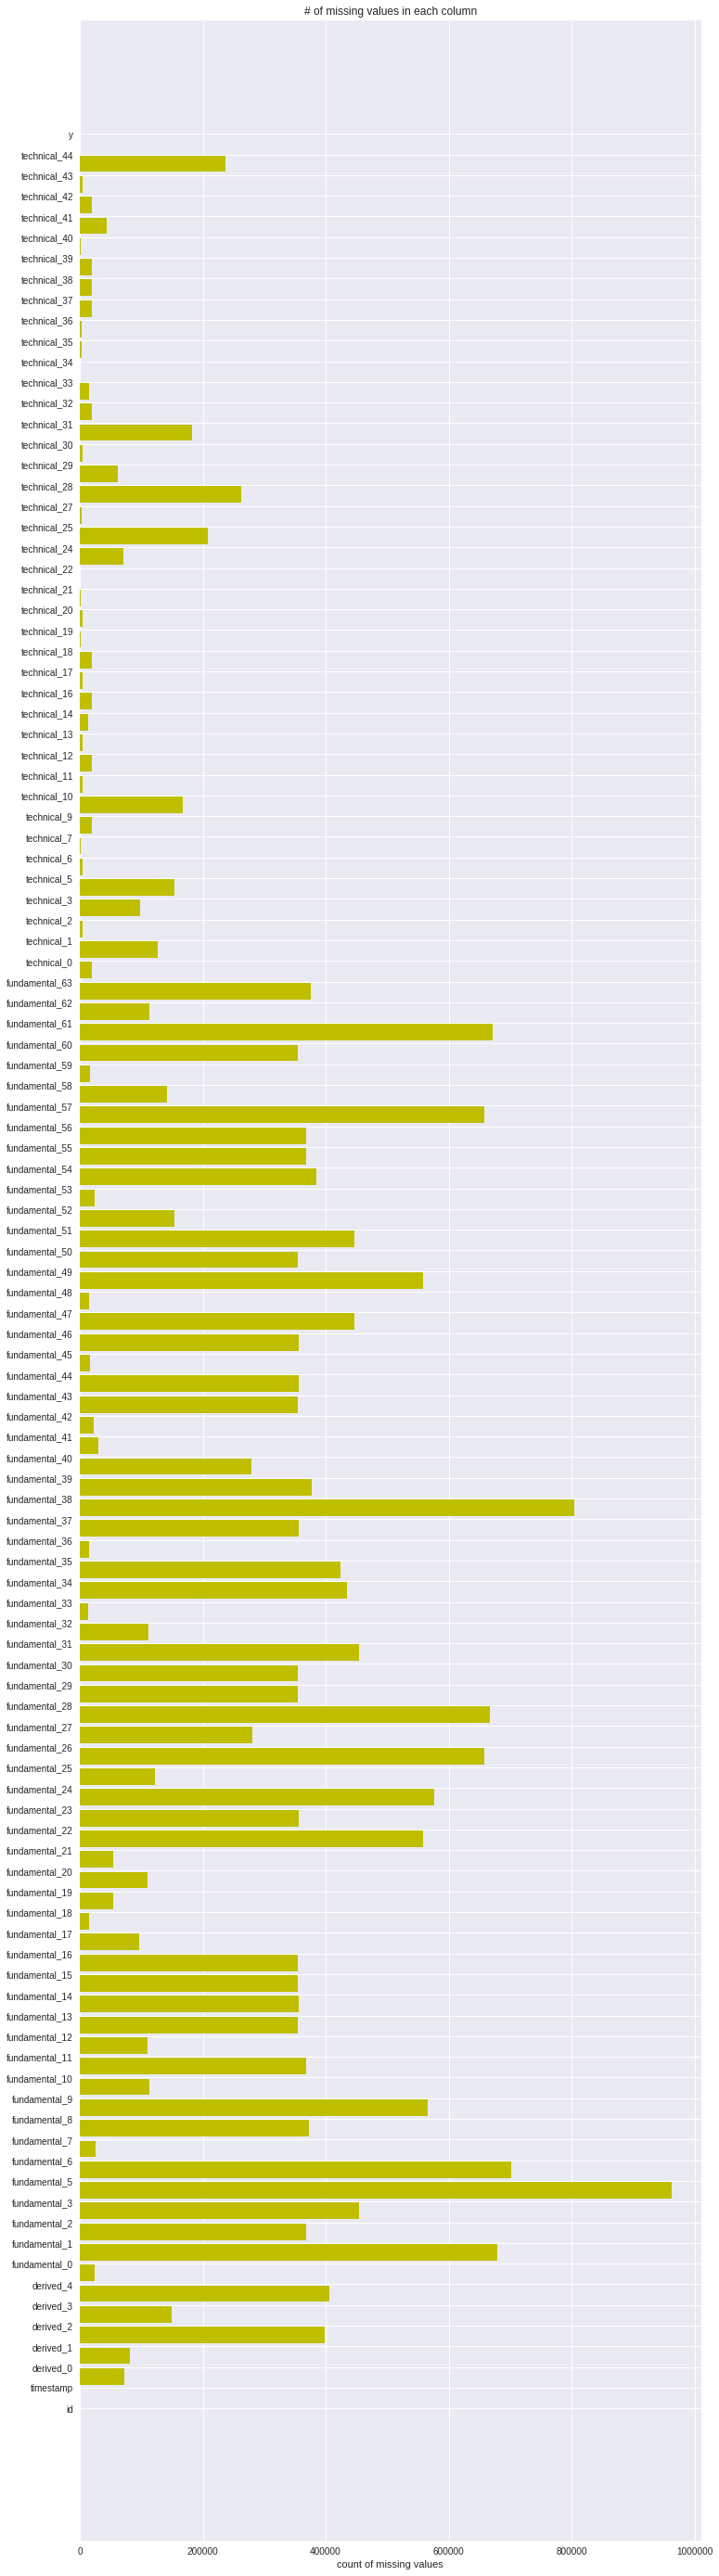

In [9]:
#6 - How much missing data do we have?

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize = (12,50))
rects = ax.barh( ind, np.array(values), color ="y")
ax.set_yticks( ind +( (width) / 2.))
ax.set_yticklabels(labels, rotation = "horizontal")
ax.set_xlabel("count of missing values")
ax.set_title("# of missing values in each column")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


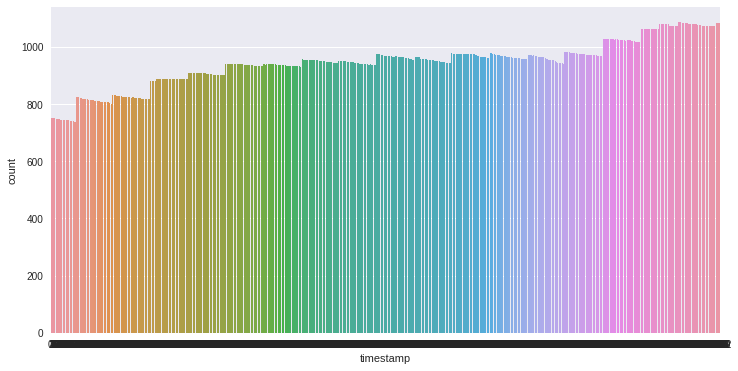

In [10]:
#7 - Counts for each timestep in the data

import seaborn as sns

fig = plt.figure(figsize=(12, 6))
sns.countplot(x="timestamp", data=df)
plt.show()

In [11]:
#8 - Unique Assets
print(len(df.id.unique()))

1424


#### The Markov Decision Process

![alt text](https://slideplayer.com/slide/3007502/11/images/5/Markov+Decision+Processes+%28MDPs%29.jpg)

- States (observations) - 1 variable (target)
- Actions - Iterate 1
- Rewards - R score (loss function)

In [0]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

# This is taken from Frans Slothoubers post on the contest discussion forum.
# https://www.kaggle.com/slothouber/two-sigma-financial-modeling/kagglegym-emulation


def r_score(y_true, y_pred, sample_weight=None, multioutput=None):
    r2 = r2_score(y_true, y_pred, sample_weight=sample_weight,
                  multioutput=multioutput)
    r = (np.sign(r2)*np.sqrt(np.abs(r2)))
    if r <= -1:
        return -1
    else:
        return r

In [0]:
class Observation(object):
    def __init__(self, train, target, features):
        self.train = train
        self.target = target
        self.features = features


class Environment(object):
    def __init__(self):
        with pd.HDFStore("/content/drive/My Drive/train.h5", "r") as hfdata:
            self.timestamp = 0
            fullset = hfdata.get("train")
            self.unique_timestamp = fullset["timestamp"].unique()
            # Get a list of unique timestamps
            # use the first half for training and
            # the second half for the test set
            n = len(self.unique_timestamp)
            i = int(n/2)
            timesplit = self.unique_timestamp[i]
            self.n = n
            self.unique_idx = i
            self.train = fullset[fullset.timestamp < timesplit]
            self.test = fullset[fullset.timestamp >= timesplit]

            # Needed to compute final score
            self.full = self.test.loc[:, ['timestamp', 'y']]
            self.full['y_hat'] = 0.0
            self.temp_test_y = None

    def reset(self):
        timesplit = self.unique_timestamp[self.unique_idx]

        self.unique_idx = int(self.n / 2)
        self.unique_idx += 1
        subset = self.test[self.test.timestamp == timesplit]

        # reset index to conform to how kagglegym works
        target = subset.loc[:, ['id', 'y']].reset_index(drop=True)
        self.temp_test_y = target['y']

        target.loc[:, 'y'] = 0.0  # set the prediction column to zero

        # changed bounds to 0:110 from 1:111 to mimic the behavior
        # of api for feature
        features = subset.iloc[:, :110].reset_index(drop=True)

        observation = Observation(self.train, target, features)
        return observation

    def step(self, target):
        timesplit = self.unique_timestamp[self.unique_idx-1]
        # Since full and target have a different index we need
        # to do a _values trick here to get the assignment working
        y_hat = target.loc[:, ['y']]
        self.full.loc[self.full.timestamp == timesplit, ['y_hat']] = y_hat._values

        if self.unique_idx == self.n:
            done = True
            observation = None
            reward = r_score(self.temp_test_y, target.loc[:, 'y'])
            score = r_score(self.full['y'], self.full['y_hat'])
            info = {'public_score': -score}
        else:
            reward = r_score(self.temp_test_y, target.loc[:, 'y'])
            done = False
            info = {}
            timesplit = self.unique_timestamp[self.unique_idx]
            self.unique_idx += 1
            subset = self.test[self.test.timestamp == timesplit]

            # reset index to conform to how kagglegym works
            target = subset.loc[:, ['id', 'y']].reset_index(drop=True)
            self.temp_test_y = target['y']

            # set the prediction column to zero
            target.loc[:, 'y'] = 0

            # column bound change on the subset
            # reset index to conform to how kagglegym works
            features = subset.iloc[:, 0:110].reset_index(drop=True)

            observation = Observation(self.train, target, features)

        return observation, reward, done, info

    def __str__(self):
        return "Environment()"

In [0]:
#9 Agent Environment Loop

def make():
  return Environment()

def test():
  env = make()
  observation = env.reset()
  
  print(len(observation.target))
  print(len(observation.train))
  
  n = 0
  
  rewards = []
  
  while True:
    target = observation.target
    target.loc[:, "y"] = 0.0006
    observation, reward, done, info = env.step(target)
    if done:
      break
    rewards.append(reward)
    n = n + 1
  
  print(info)
  print(n)
  print(rewards[0:15])

In [18]:
#10 test it! 
test()

968
806298
{'public_score': 0.017829389044606993}
906
[-0.15367924219682547, -0.026140842058380256, -0.11231466648997339, -0.1682864647754967, -0.02167206673334583, -0.08693960274478746, -0.30473984896980755, -0.09382985372389648, -0.09945405540987054, -0.05014964521079367, -0.14505984849997253, -0.19402383221313182, -0.0017121406664662242, -0.01388272905431911, -0.2019392220527433]


How could this RL framework be extended? Q learning! But we need a real-time API or simulated environment where actions effect the enviroment state

![alt text](https://www.researchgate.net/profile/Kao-Shing_Hwang/publication/220776448/figure/fig1/AS:394068661161984@1470964698231/The-Q-Learning-Algorithm-6.png)

